### Basic Example of a Neural Network with Tensorflow and Keras

#### Tensorflow and Keras

TensorFlow was developed at Google to use internally for machine learning tasks, and applied to the applications like speech recognition, Search, Gmail, etc. It was made public in 2015 as an open source application. The library is in C++, used with Python API. TensorFlow can be used for various problems like image recognition, language processing, implementation in self-driving cars, etc. There are various alternatives available to TensorFlow such as Theano, and Torch.

We are going to use Keras in this notebook, with Tensorflow as a backend engine. Keras is a high-level wrapper, that can be used both with TensorFlow and Theano, which simplifies common operations. The code is similar to scikit-learn, making it easier to get used to it, while in the background TensorFlow or Theano is used for processing.

#### The data

Let's start by importing MNIST database (a subset of a larger set by National Institute of Standards and Technology). This is a classic dataset containing 60000 training images, 10000 test images, and correspoding training and test labels. The images are handwritten digits, in the shape of 28 x 28 pixels, and divided into 10 categories (from 0 to 9).

#### The versions

In this example I am using Keras v.2.1.4 and TensorFlow v.1.5.0 with GPU (using NVIDIA CUDA). Running examples on a GPU can speed up the training process. 

In [1]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Importing keras and tensorflow, and printing the versions
import keras
print('Keras: {}'.format(keras.__version__))

import tensorflow as tf
print('TensorFlow: {}'.format(tf.__version__))

Using TensorFlow backend.


Keras: 2.1.4
TensorFlow: 1.5.0


In [2]:
# Importing MNIST data set
from keras.datasets import mnist

# Assigning the data from the data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training images shape: {}'.format(X_train.shape))
print('Training labels shape: {}'.format(y_train.shape))
print('Test images shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


As we can see, the data is in the shape of 28 x 28 pixels. Let's look at the first ten labels in the data set. Also we are going to visualize the first 10 digits by plotting the pixels information. 

In [3]:
# First 10 labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [4]:
# Importing matplotlib library for plotting
%matplotlib inline
import matplotlib.pyplot as plt

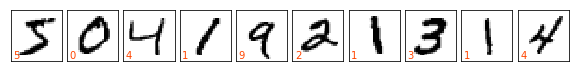

In [5]:
# Defining the figure for plotting, using 'xticks':[] and 'yticks':[]
# to avoid the ticks on axes
fig, axes = plt.subplots(1, 10, figsize=(10, 1),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Looping through the images and their corresponding labels
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='binary')
    ax.text(0.05, 0.05, str(y_train[i]), transform=ax.transAxes, color='orangered')

#### Neural Network with Keras and Tensorflow

Models are defined as a sequence of layers. Sequential is imported from keras.models library, and a Sequential model is created.

The network below consists of a sequence of two Dense layers. These layers are fully connected. We are using 'relu' rectifier activation function on the first layer (more on the relu on [Medium](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)). We are using 'softmax' as an activation function in the second layer, which will return an array of 10 probability scores, to define which class does the current digit belongs to.

We will flatten the 28 x 28 pixels image to an input vector of a shape 784 pixels

In [6]:
# Importing Sequential and Dense from keras
from keras.models import Sequential
from keras.layers import Dense

# Creating the model and adding the layers
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

Now that we have the model defined, it is time to compile it. Under the covers TensorFlow is used for compiling. We need to specify additional properties required for the neural network. 

* __A loss function__: measures the performance of a model, comparing y_pred to actual y. We will be using 'categorical_crossentropy' as the loss function for our model. 'categorical_crossentropy' reguires the target to be in a categorical format. In our case we have 10 categories, so the target should be in a format of 10-dimensional vector, all 0s except 1 for the actual index correspondoing to the class. [List of Loss functions](https://keras.io/losses/) at keras website.

* __An optimizer__: searches through different weights for the network, and determines how the model will be updated based on the loss function. We will be implementing Adam optimizer. Adam optimizer is an extension to stochastic gradient descent. [List of Optimizers](https://keras.io/optimizers/) at keras website. More on Adam at [machinelearningmastery](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

* __Metrics__: is a function to judge the performance of the model. In this case we will collect and report the classification accuracy.

In [7]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

The data needs to preprocessed before applying the model to it. First we reshape 28 x 28 pixels into a vector of a shape 784. Then we are normalizing the scale from 0-255 to the range 0-1 by dividing the values by 255. Also we are converting the labels to categorical format. After the data is converted, we will print the first row in the training data to demonstrate converted label into categorical.

In [8]:
# Reshaping the data
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

# Converting the data to float32 type, and normalizing
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Importing to_categorical to convert the label
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Displaying first row of training label, corresponding to 5
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Once all the above steps are taken, we can fit the training data and evaluate the model on the test data. This model is fit over 5 epochs (the amount of iterations over the data set), and the batch size of 150 (the total number of training samples present in a single batch).

In [10]:
# Fitting the model
model.fit(X_train, y_train, epochs=5, batch_size=150)

# Evaluating the model on the test set
score = model.evaluate(X_test, y_test)

# Printing the accuracy score of the model over the test set
print('\nModel {}: {}'.format(model.metrics_names[1], score[1]))

Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2663 - acc: 0.9234
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.1019 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0655 - acc: 0.9805
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0463 - acc: 0.9863
Epoch 5/5
10000/10000 [==============================] - 1s 69us/step

Model acc: 0.981


The model accuracy on the test data turns out to be about 98%. There is slight discprepancy between the training acccuracy and test accuracy due to some overfitting.